# Graded Lab Assignment: Logistic Regression (10 points)

In this assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline. 

### Deadline Tuesday, October 10th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

The points for the assignment are distributed as follows:
* The implementation
    - prediction_function (0.5)
    - cost_function (1)
    - compute_gradient (1)
    - correct double for loop (2)
    - correct stop condition (0.5)
    - preventing overfitting (1)
    - systematically choosing learning rate (1) 
    - best score analysis (1)
    - summary (1)
    - comments (0.5)
    - code (0.5)
    

In [62]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Scikit-learn is a toolkit that has several datasets built in. You first need to install the toolkit: http://scikit-learn.org/stable/install.html

The MNIST dataset that you will be using for this assignment contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the cell below shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
 [[0 1 2 3 4]
 [5 6 7 8 9]]


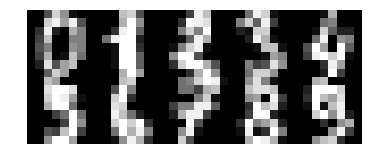

In [63]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = hstack(digits.images[:5,:,:])
secondrow = hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print ("The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10])))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

(1) Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. 
(2) Systematically pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner (show how you do it). 
(3) Plot how your score on the test set improves over time. My best score was about 85% correct!
(4) Write a short summary of what you have done (and why) to accomplish steps (1), (2) and (3).
(5) Make sure to comment your code!

In [64]:
#Make a prediction function h
def prediction_function(x,theta):
    h = 1/(1 + exp(- dot(x, theta)))    #the Sigmoid Function
    return h

In [65]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):
    
    a = dot(- y.T , log(x_predict))    # a is the case where y=1 since b will be 0
    b = dot((1 - y).T , log(1 - x_predict))     #b is the case where y=0 sinca a will b 0
    c =  1/size(x) * (a - b)    #the cost function according to the formula
    
    return c


In [66]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    dt = 1/size(x) * outer(x.T , (x_predict - y))  #the gradient fct according to the formula
    return dt

The score is: 0.888888888889


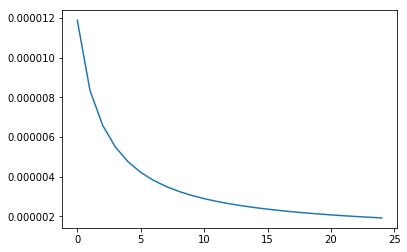

In [67]:
#Choose a suitable learning rate
alpha = 0.005   # .88 is a pretty good probability i would say, so I think the alpha is suitable (I have also tried different values for alpha and this one gave the best results)
iterations = 25

theta = np.zeros((64,10))
dtheta = np.zeros((64,10))

#It is important to check that you're not overfitting by testing your prediction on a testset
x = np.reshape(digits.images[:1500],(1500,64))    #training set
x_test = np.reshape(digits.images[1500:],(297,64))    #test set

target = digits.target[:1500]    #values for the training set
target_test = digits.target[1500:]    #values for the test set


t = 0    #variable for counting good estimations

cost_v = zeros(iterations)    #array that stores the value of the cost fct after every iteration

# we apply logistic regression to the training set


for i in range(iterations):
    for j in range(x.shape[0]):
        x_predict = prediction_function(x[j,:],theta)
        y = np.zeros(10)
        y[target[j]] = 1
        cost = cost_function(x_predict,y)
        dtheta = compute_gradient(x_predict, y, x[j,:])
        theta -= dot(alpha, dtheta)
    cost_v[i] = cost

#we apply logistic regression to the test set using the thetas we have computed on the traaining set
sc = zeros(iterations)

for i in range(iterations):
    for j in range(x_test.shape[0]):
        pred = prediction_function(x_test[j,:], theta)
        cost2 = cost_function(pred,y)
        if target_test[j] == argmax(pred):
            t += 1
    sc[i] = t / x_test.shape[0]  #this array retains the score for each iteration
    t = 0


print('The score is:' , mean(sc))    #prints the score of out test set

plt.plot(cost_v)   # we are not overfitting since choosing to update theta in our test sets will give a cost function very similar to this one


Written assignment:

1.  a) the hypothesis will be the dot product between the transpose of the vector ν and  x(i)
    b) 1/2m (X dot (theta) - Y).T dot (X dot (theta) - Y)
    c)
    d) (theta)j := (theta)j - (alpha)(delta)/(delta)(theta)j) * J((theta0), ... ,(theta)j)
